In [8]:
%run ./global_class/config.ipynb
%run ./global_class/getShanghai.ipynb

In [2]:
df_target = pd.read_csv('TARGET-communities-extract-wellbeing.csv')
gdf_neighborhoods = pd.read_pickle('./pickles/utseus-cendus-shanghai-neighborhoods.pk')

In [3]:
df_target.head()

,Unnamed: 0,clean,smell,noise,town,district,longitude,latitude
0,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287,31.155882
1,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529,31.144327
2,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520,31.042285
3,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237,31.240725
4,万里名轩社区居委会,2,NaN,0.0,万里街道,普陀区,121.403601,31.269155


In [4]:
gdf_target = gpd.GeoDataFrame(df_target, geometry = [Point(x,y) for x,y in zip(df_target.longitude, df_target.latitude)])
gdf_target.crs = {'init': 'epsg:4326'} #degree world

In [5]:
gdf_neighborhoods.head()

,NAME,TYPE,geometry
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...


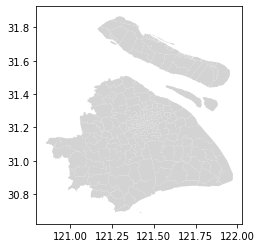

In [6]:
gdf_neighborhoods.plot(color="lightgrey")

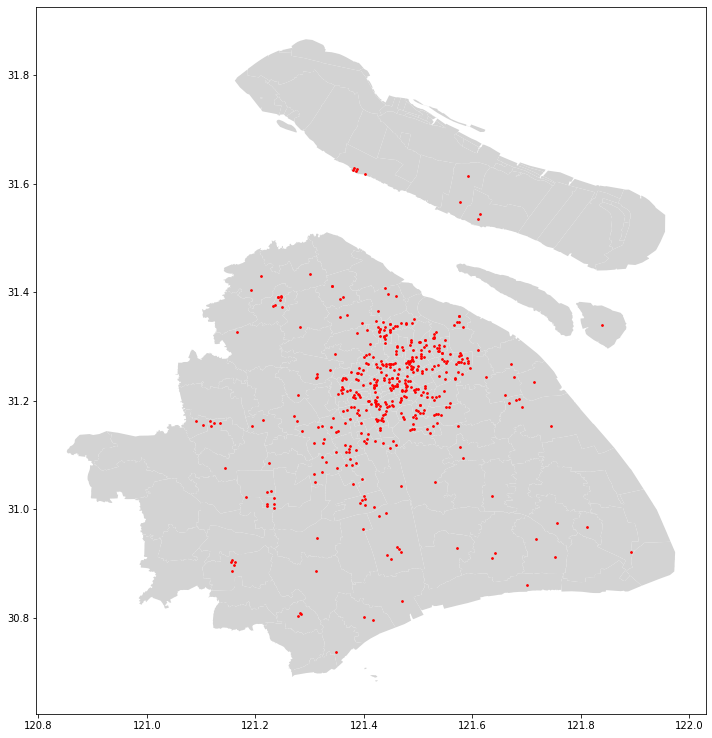

In [7]:
fig, axes = plt.subplots(figsize=(15,13))
gdf_neighborhoods.plot(ax=axes, color="lightgrey")
gdf_target.plot(ax=axes, color="red", markersize=3)

In [9]:
print(len(gdf_target))
print(len(gdf_target.loc[gdf_target.within(shanghai)]))

467
461


In [10]:
gdf_target.drop(gdf_target.loc[gdf_target.within(shanghai)].index)

,Unnamed: 0,clean,smell,noise,town,district,longitude,latitude,geometry
28,东泉新村居委会,2,1.0,0.0,NaN,NaN,NaN,NaN,POINT (nan nan)
31,东礁新村第二居委会,2,0.0,0.0,NaN,NaN,NaN,NaN,POINT (nan nan)
57,仁文居委会,2,NaN,0.0,NaN,NaN,NaN,NaN,POINT (nan nan)
109,卫清新村居委会,2,0.0,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
129,四村居委会,4,0.0,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
306,海棠居委会,3,1.0,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)


In [11]:
#clean the nan geometry
gdf_target = gdf_target.loc[gdf_target.within(shanghai)]

In [12]:
#Other solution with pyroj
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


In [16]:
gdf_target['longitude_m'] = gdf_target[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_target['latitude_m'] = gdf_target[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

C:\Users\Roger\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Roger\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
gdf_neighborhoods.head()

,NAME,TYPE,geometry
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...


In [28]:
time = ManagingTime()
time.displayStartTime()
gdf_neighborhoods_m = gdf_neighborhoods.to_crs({'init': 'epsg:4479'})
time.displayRunningTime()

Starting time: 2020-01-05 16:21:58.861882
Running time: 0:07:24.531223


In [15]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = [Point(x,y) for x,y in zip(df_target.longitude, df_target.latitude)])
#gdf_target.crs = {'init': 'epsg:4326'} #degree world

In [16]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = [Point(x,y) for x,y in zip(df_target.longitude_m, df_target.latitude_m)])
#gdf_target.crs = {'init': 'epsg:4479'} #china transpolation

In [18]:
gdf_target_m = gdf_target.set_geometry([Point(x,y) for x,y in zip(gdf_target.longitude_m, gdf_target.latitude_m)])
gdf_target_m.crs = {'init': 'epsg:4479'} #china transpolation

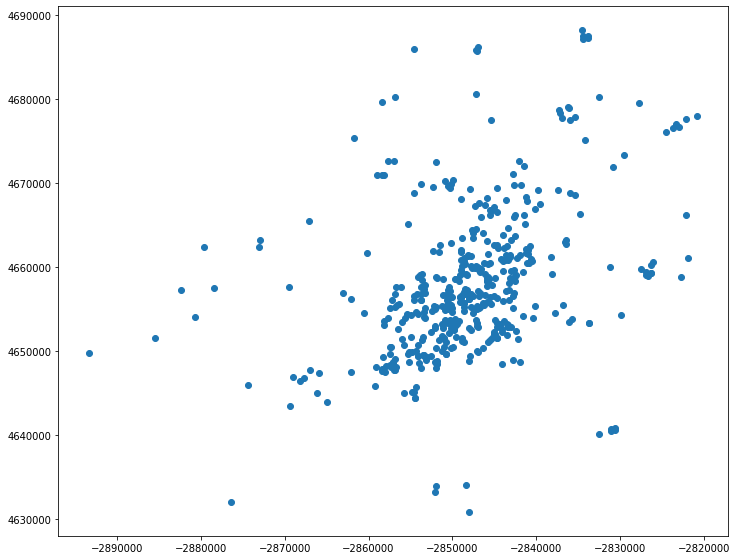

In [19]:
gdf_target_m.plot(figsize=(12,10))

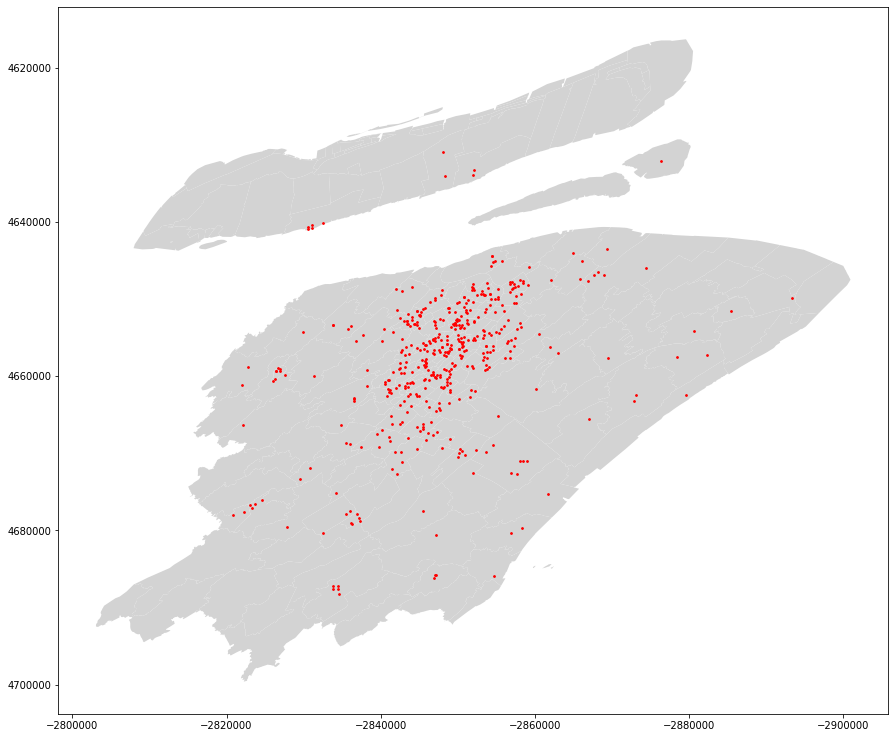

In [29]:
fig, axes = plt.subplots(figsize=(15,13))
fig.gca().invert_xaxis()
fig.gca().invert_yaxis()
gdf_neighborhoods_m.plot(ax=axes, color='lightgrey')
gdf_target_m.plot(ax=axes, color="red", markersize=3)

In [20]:
gdf_target_m.crs

{'init': 'epsg:4479'}

In [21]:
gdf_target_m.head()

,Unnamed: 0,clean,smell,noise,town,district,longitude,latitude,geometry,longitude_m,latitude_m
0,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06
1,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06
2,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06
3,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06
4,万里名轩社区居委会,2,NaN,0.0,万里街道,普陀区,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06


In [22]:
# We create here a surface (a disk of 500m radius)
gdf_target_m['surface_buffer'] = gdf_target_m.geometry.buffer(500)
#Area of the polygone
gdf_target_m.surface_buffer.loc[0].area

784137.1226363088

In [23]:
gdf_target_m.head()

,Unnamed: 0,clean,smell,noise,town,district,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer
0,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...
1,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,..."
2,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,..."
3,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...
4,万里名轩社区居委会,2,NaN,0.0,万里街道,普陀区,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...


In [24]:
gdf_target_m = gdf_target_m.drop(columns=['Unnamed: 0', 'town', 'district'])

In [25]:
gdf_target_m.to_pickle("./clean_pickles/target.pk")

In [26]:
gdf_target = pd.read_pickle("./clean_pickles/target.pk")
len(gdf_target)

461

In [28]:
gdf_target = gdf_target.set_geometry('surface_buffer')